In [24]:
'''
Script to estimate cases responsible per cladeas calculated the frequency of the clade * cases
sequence data pulled from GISAID, cases pulled from IDPH and CDC for Illinois and the US respectively.

'''

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import datetime

cases = pd.read_csv('/Users/tlh4362/Desktop/illinois_cases_idph.csv') #IDPH
gisaid = pd.read_csv('/Users/tlh4362/Desktop/usa_illinois_clades_gisaid.csv') #GISAID
# cases = pd.read_csv('/Users/tlh4362/Desktop/usa_cases_cdc.csv') #cdc


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [25]:
gisaid.at[gisaid[gisaid['Pango.lineage'] == 'B.1.2'].index, 'Nextstrain_clade'] = '20G'

In [26]:
gisaid = gisaid[gisaid['division'] == 'Illinois']

In [27]:
gisaid = gisaid.drop(gisaid[gisaid['Pango.lineage']=='Unassigned'].index)

In [28]:
gisaid['Nextstrain_clade'] = gisaid['Nextstrain_clade'].replace({    
    '21J (Delta)' : '21J/I/A (Delta)',
    '21I (Delta)' : '21J/I/A (Delta)',
    '21A (Delta)' : '21J/I/A (Delta)',
    '20I (Alpha)':'20I (Alpha 1)',
    '22B (Omicron)': '21M/K/L-22A/B/C (Omicron)',
    '22A (Omicron)':'21M/K/L-22A/B/C (Omicron)',
    '21K (Omicron)':'21M/K/L-22A/B/C (Omicron)',
    '21L (Omicron)':'21M/K/L-22A/B/C (Omicron)',
    '22C (Omicron)':'21M/K/L-22A/B/C (Omicron)',
    '21M (Omicron)':'21M/K/L-22A/B/C (Omicron)'}) #collapsing Delta and Omicron clades into one for convenience, as per the main figures.

In [29]:
idx = gisaid[gisaid['Nextstrain_clade'].isin(['P.1.10.1', 'B.1.369.1','BA.2.3.3', 'AY.39.1.4','B.1.1.400', 'B.1.308',
       ' Marin Counties', 'B.1.326', 'B.1.285', 'B.1.1.350', '4/17/20',
       '4/20/20', '4/5/20', '11/29/21', '8/12/20', '4/13/20', '7/5/20',
       '4/29/20', '5/5/20', '6/24/20', '4/27/20', '12/1/21', '11/30/21',
       '6/27/20', '12/6/21', '6/13/20', '4/24/20', 'B.1.1.451',
       'B.1.1.122', 'B.1.291', 'B.1.67', '8/13/21', '8/17/21', '8/24/21',
       '8/31/21', 'B.1.1.84', 'B.1.517.1', 'B.1.1.415', '1/5/21',
       '1/8/21', '6/10/20', '1/4/21', '12/31/20', '10/26/20', '1/7/21',
       '1/11/21', '4/28/20', '12/11/20', '10/12/20', '1/2/21', '12/29/20',
       '12/21/20', '1/12/21', '1/13/21', '1/6/21', '12/30/20', '12/9/20',
       '12/10/20', '12/8/20', '1/3/21', '1/9/21', '12/7/20', '12/23/20',
       'B.1.538'])].index #manually removedj errors in column

gisaid.at[idx, 'Nextstrain_clade'] = None

In [30]:

for clade in ['20B', '20A', '21J (Delta)', '20C', '20E (EU1)',
       '21C (Epsilon)', '19A', '19B']:
    idx = gisaid[gisaid['Unnamed: 9']==clade].index
    gisaid.at[idx, 'Nextstrain_clade'] = gisaid.loc[idx, 'Unnamed: 9']

idx = gisaid[gisaid['date']==' Yolo'].index
gisaid.at[idx, 'date'] = gisaid.loc[idx, 'Unnamed: 10']
gisaid.at[idx, 'Nextstrain_clade'] = gisaid.loc[idx, 'Unnamed: 11']

for d in ['B.1.1', 'B.1.110.3', 'AY.44', 'B.1.2',
 'B.1' ,'AY.103', 'AY.118', 'B.1.139' ,'AY.3' ,'AY.5.3', 'AY.39', 'B.1.609',
 'B.1.1.464', 'B.1.1.352', 'B.1.234', 'B.1.558', 'B.1.311', 'B.1.1.222',
 'B.1.1.518', 'B.1.3', 'B.1.306', 'B.1.1.304', 'B.1.378', 'B.1.509' ,'B.1.243',
 'B.1.177.53' ,'B.1.429', 'B.1.568' ,'B' ,'B.1.162', 'B.1.160.14', 'B.1.551',
 'B.1.595', 'A' ,'B.1.324', 'B.1.1.381' ,'B.1.578', 'B.1.582', 'B.1.239',
 'B.1.240']:

    idx = gisaid[gisaid['date']==d].index
    gisaid.at[idx, 'date'] = None
gisaid['date'] = pd.to_datetime(gisaid['date'])
    

In [31]:
gisaid['Collection.date'] = pd.to_datetime(gisaid['Collection.date'])

print(gisaid.shape)

gisaid = gisaid[(gisaid['Collection.date'] >= pd.to_datetime('2020-03-17')) & (gisaid['Collection.date'] <= pd.to_datetime('2022-03-17'))]

print(gisaid.shape)


(22687, 12)
(18165, 12)


In [32]:
idx_list = []
idx_list.extend(list(gisaid[(gisaid['Nextstrain_clade']=='21J/I/A (Delta)') & (gisaid['date'] < pd.to_datetime('2021-04-01'))].index))
idx_list.extend(list(gisaid[(gisaid['Nextstrain_clade']=='21M/K/L-22A/B/C (Omicron)') & (gisaid['date'] < pd.to_datetime('2021-12-01'))].index))
idx_list.extend(list((gisaid[(gisaid['Nextstrain_clade']=='20I (Alpha 1)') & (gisaid['date'] < pd.to_datetime('2020-11-01'))].index)))


In [33]:
gisaid = gisaid.drop(idx_list)

In [34]:
#calculating weekly counts of clades

end_date = gisaid['Collection.date'].sort_values().unique()[-1]

start = pd.to_datetime('2020-03-17')

weekly_counts = pd.DataFrame()
end = start + datetime.timedelta(days = 7)

while end <= end_date:
    end = start + datetime.timedelta(days = 7)
    tmp = gisaid[(gisaid['Collection.date']>=start) & (gisaid['Collection.date']<end)]
    week = '{} to {}'.format(str(start).split('00:')[0], str(end).split('00:')[0])
    for clade, count in zip(tmp['Nextstrain_clade'].value_counts().index, tmp['Nextstrain_clade'].value_counts().values):
        weekly_counts.at[week, clade] = count
    start = end

In [35]:
# cases['Date'] = pd.to_datetime(cases['Date']) #US
cases['testDate'] = pd.to_datetime(cases['testDate']) #US


In [36]:
#calculating weeks it took for clade to reach threshold frequencies and the number of cases each clade is responsible for

threshold_df = pd.DataFrame()

estimated_clade_cases_df = pd.DataFrame()

for threshold in [0.5, 0.75, 0.9]:
    for clade in weekly_counts.columns:
        tmp = []
        for week in weekly_counts.index:
            count = weekly_counts.loc[week, clade]
            total = weekly_counts.loc[week, :].sum()
            proportion = count/total
            ##################################
            #dealing with clades case estimates
            ##################################
            week_start = pd.to_datetime(week.split('to')[0])
            week_end = pd.to_datetime(week.split('to')[1])
#             week_total_cases = cases[(cases['Date'] >= week_start) & (cases['Date'] < week_end)]['New Cases'].sum()#US
            week_total_cases = cases[(cases['testDate'] >= week_start) & (cases['testDate'] < week_end)]['cases_change'].sum() #IL

            estimated_cases = week_total_cases * proportion
            estimated_clade_cases_df.at[week, clade] = estimated_cases
            
            ##################################
            #dealing with clades case estimates
            ##################################
            
            
            if count >= 10: #check if there are at least 10 samples
                if proportion >= threshold: #check whether the clade reaches dominance
                    first = list(weekly_counts.index).index(weekly_counts[clade].dropna().index[0])
                    week_threshold = list(weekly_counts.index).index(week)
                    tmp.append(week_threshold - first)
        if len(tmp) > 0:
            threshold_df.at[clade, threshold] = min(tmp)
            

In [37]:
#calculating cumulative sum for the cases each clade is responsible for
estimated_clade_cases_df = estimated_clade_cases_df.cumsum()

In [38]:
#determining weeks it takes to for a clade from date of first detection to reach cumulative threshold.

est_cases_threshold_df = pd.DataFrame()
for threshold in [100000,100000*2, 100000*5, 100000*10 ]:
    for c in estimated_clade_cases_df.columns:
        diff_list = []
        for d in range(len(estimated_clade_cases_df[c].dropna())):
            date = estimated_clade_cases_df[c].dropna().index[d]
            est_cases = estimated_clade_cases_df[c].dropna().iloc[d]

            if est_cases > threshold:
                week_reached_threshold = list(estimated_clade_cases_df[c].dropna().index).index(date)
                week_first_detection = list(estimated_clade_cases_df[c].dropna().index).index(estimated_clade_cases_df[c].dropna().index[0])
                diff = week_reached_threshold - week_first_detection
                diff_list.append(diff)
        if len(diff_list) > 0:
            est_cases_threshold_df.at[c, threshold] =  min(diff_list)
            
            

In [39]:
est_cases_threshold_df

,100000,200000,500000,1000000
20A,14.0,33.0,NaN,NaN
20G,18.0,20.0,NaN,NaN
20C,30.0,NaN,NaN,NaN
20B,32.0,NaN,NaN,NaN
20I (Alpha 1),15.0,NaN,NaN,NaN
21J/I/A (Delta),16.0,20.0,32.0,NaN
21M/K/L-22A/B/C (Omicron),3.0,4.0,6.0,10.0


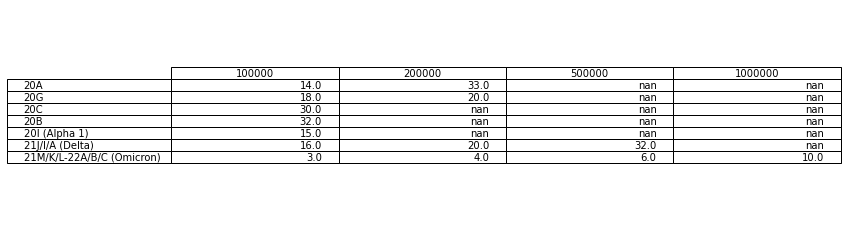

In [40]:
from matplotlib.backends.backend_pdf import PdfPages

fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=est_cases_threshold_df.values,colLabels=est_cases_threshold_df.columns,rowLabels=est_cases_threshold_df.index , loc='center')

# pp = PdfPages('/Users/tlh4362/Desktop/usa_est_cases.pdf')
# pp.savefig(fig, bbox_inches = 'tight')
# pp.close()

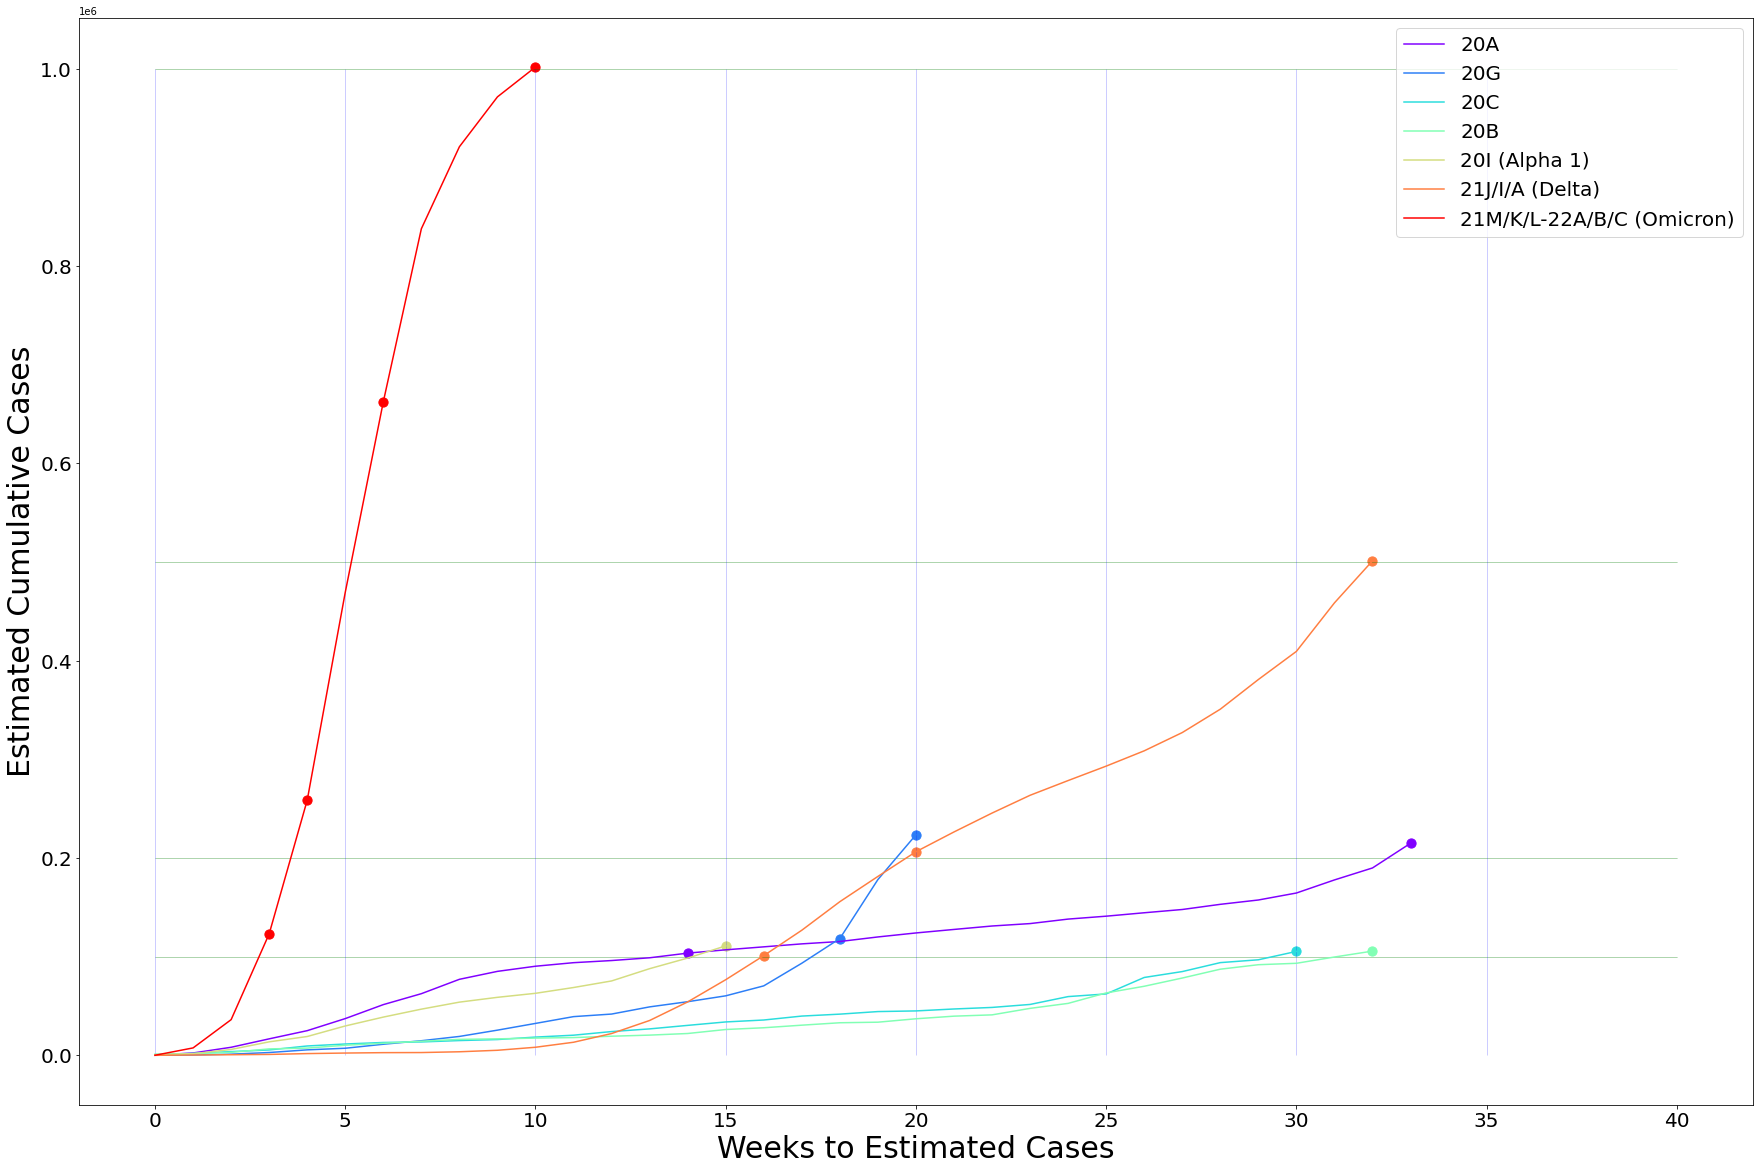

In [41]:
import math
from matplotlib.pyplot import cm

weeks = 40
color = cm.rainbow(np.linspace(0, 1, len(est_cases_threshold_df.index)))
plt.figure(figsize = [30,20])
for clade, c in zip(est_cases_threshold_df.index, color):
    week_reached = int(est_cases_threshold_df.loc[clade, :].max()) +1
    tmp = estimated_clade_cases_df[clade].dropna().iloc[0:week_reached]
    tmp = tmp.reset_index(drop = True)
    plt.plot(tmp, label = clade, color = c)
    for threshold in est_cases_threshold_df.columns:
        plt.hlines(y = threshold, xmin = 0, xmax = weeks, linewidth = 1, color = 'g', alpha = 0.05)
        week_needed = est_cases_threshold_df.loc[clade, threshold] 
        if math.isnan(week_needed) == False:
            plt.scatter(week_needed, estimated_clade_cases_df[clade].dropna().iloc[int(week_needed)], color = c, s = 85)

for i in range(0,weeks,5):
    plt.vlines(x = i, ymin = 0, ymax = 1000000, linewidth = 1, color = 'b', alpha = 0.2)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.xlabel('Weeks to Estimated Cases', fontsize = 30)
plt.ylabel('Estimated Cumulative Cases', fontsize = 30)
plt.legend(fontsize = 20) 
# plt.savefig('/Users/tlh4362/Desktop/usa_est_cases.eps', format = 'eps')
